In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("eplleaguetables.csv")
df

,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Season
0,1,Man Utd,38,23,11,4,78,37,41,80,10-11
1,2,Chelsea,38,21,8,9,69,33,36,71,10-11
2,3,Man City,38,21,8,9,60,33,27,71,10-11
3,4,Arsenal,38,19,11,8,72,43,29,68,10-11
4,5,Tottenham,38,16,14,8,55,46,9,62,10-11
...,...,...,...,...,...,...,...,...,...,...,...
195,16,West Ham,38,10,9,19,49,62,-13,39,19-20
196,17,Aston Villa,38,9,8,21,41,67,-26,35,19-20
197,18,Bournemouth,38,9,7,22,40,65,-25,34,19-20
198,19,Watford,38,8,10,20,36,64,-28,34,19-20


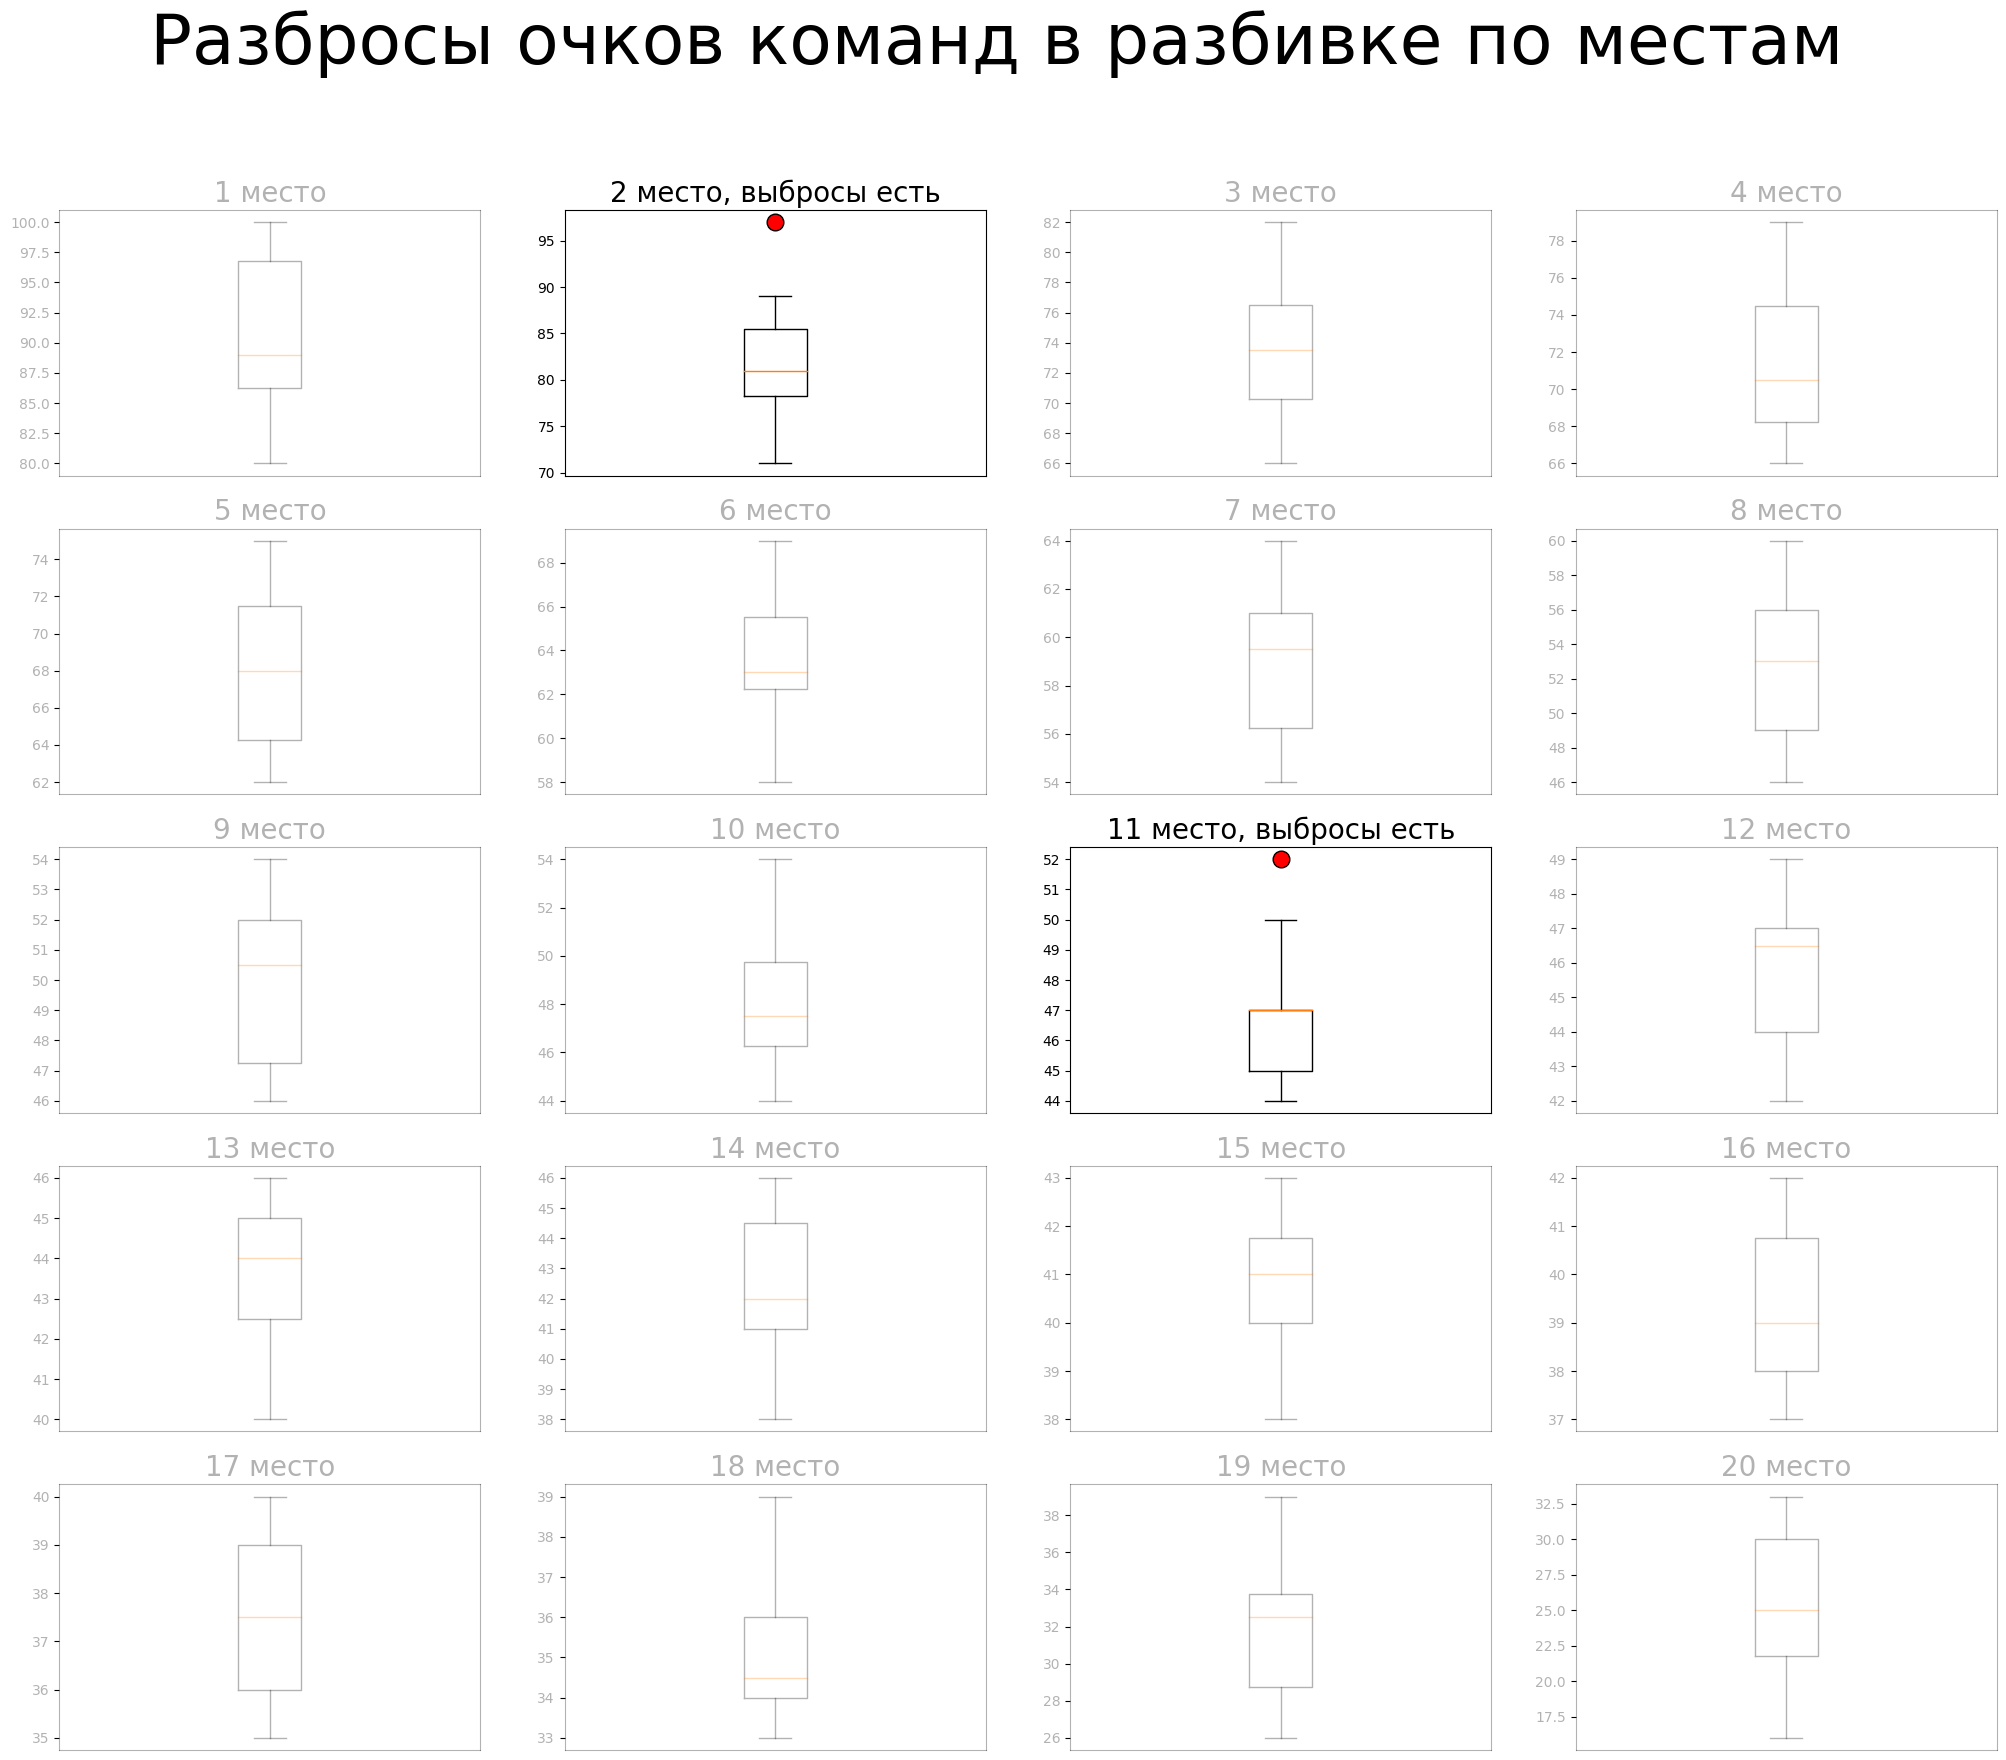

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,20))
fig.suptitle("Разбросы очков команд в разбивке по местам", size=50)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                    linestyle='none', markeredgecolor='black')
c = 1
for i in range(5):
    for j in range(4):
        data = df[df["Position"] == c]
        bp = axs[i, j].boxplot(data["Points"], showfliers=True,
                                flierprops=flierprops)
        flag = False
        for flier in bp['fliers']:
            if flier.get_data()[0].size != 0: # выброс есть
                flag = True
                axs[i, j].set_title(f"{c} место, выбросы есть", size=20)
        alpha = 0.3 if not flag else 1.0
        title = f"{c} место, выбросы есть" if flag else f"{c} место"
        
        # наведение красоты
        axs[i, j].set_title(title, size=20, alpha=alpha)
        for element in ['boxes', 'whiskers', 'medians', 'caps']:
            for item in bp[element]:
                item.set_alpha(alpha)
        axs[i, j].spines['top'].set_alpha(alpha)
        axs[i, j].spines['right'].set_alpha(alpha)
        axs[i, j].spines['left'].set_alpha(alpha)
        axs[i, j].spines['bottom'].set_alpha(alpha)
        axs[i, j].get_xaxis().set_ticks([])
        for label in axs[i, j].get_xticklabels() + axs[i, j].get_yticklabels():
            label.set_alpha(alpha)
        c += 1
plt.show()